In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
#df = pd.read_excel("all-euro-data-2024-2025.xlsx", sheet_name="E0")
df = pd.read_csv("Data/E0.csv")
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,16/08/2024,20:00,Man United,Fulham,1,0,H,0,0,...,1.86,2.07,1.83,2.11,1.88,2.11,1.82,2.05,1.90,2.08
1,E0,17/08/2024,12:30,Ipswich,Liverpool,0,2,A,0,0,...,2.05,1.88,2.04,1.90,2.20,2.00,1.99,1.88,2.04,1.93
2,E0,17/08/2024,15:00,Arsenal,Wolves,2,0,H,1,0,...,2.02,1.91,2.00,1.90,2.05,1.93,1.99,1.87,2.02,1.96
3,E0,17/08/2024,15:00,Everton,Brighton,0,3,A,0,1,...,1.87,2.06,1.86,2.07,1.92,2.10,1.83,2.04,1.88,2.11
4,E0,17/08/2024,15:00,Newcastle,Southampton,1,0,H,1,0,...,1.87,2.06,1.88,2.06,1.89,2.10,1.82,2.05,1.89,2.10


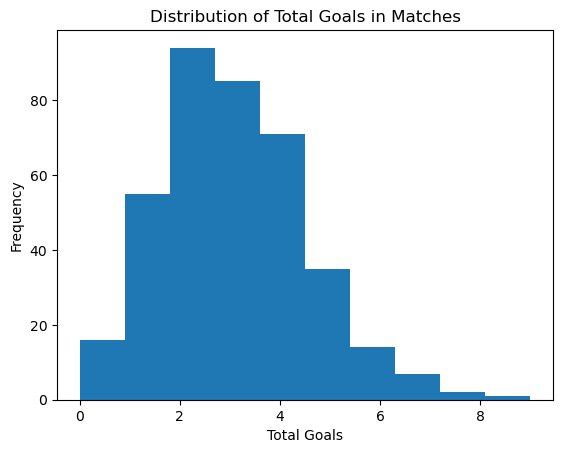

In [3]:
df["TotalGoals"] = df["FTHG"] + df["FTAG"]
df["TotalGoals"].hist()
plt.title("Distribution of Total Goals in Matches")
plt.xlabel("Total Goals")   
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [4]:
goal_counts = df["TotalGoals"].value_counts().sort_index()
total_matches = goal_counts.sum()
goal_probs = goal_counts / total_matches # Empirical probabilities

In [5]:
mu = df["TotalGoals"].mean()
x_vals = range(0, df["TotalGoals"].max() + 1)
poisson_probs = poisson.pmf(x_vals, mu) # Poisson probabilities

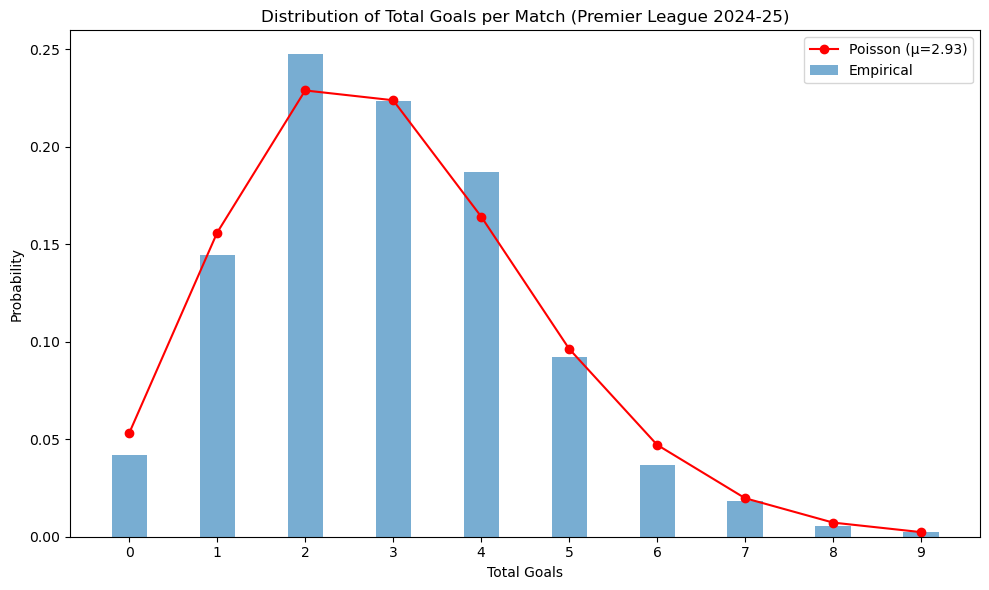

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(x_vals, goal_probs, alpha=0.6, label="Empirical", width=0.4, align='center')
plt.plot(x_vals, poisson_probs, 'o-', color='red', label=f"Poisson (μ={mu:.2f})")
plt.title("Distribution of Total Goals per Match (Premier League 2024‑25)")
plt.xlabel("Total Goals")
plt.ylabel("Probability")
plt.xticks(x_vals)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

In [7]:
# is there overdispersion?

df["TotalGoals"].var(), df["TotalGoals"].mean() # there is actually underdispersion so dont use negative binomial

(2.6157130954034225, np.float64(2.9342105263157894))